In [16]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
np.random.seed(25)

print('Done!')

Done!


In [17]:
from PIL import Image

directory_benign_train = '../input/skin-cancer-malignant-vs-benign/train/benign'
directory_malignant_train = '../input/skin-cancer-malignant-vs-benign/train/malignant'
directory_benign_test = '../input/skin-cancer-malignant-vs-benign/test/benign'
directory_malignant_test = '../input/skin-cancer-malignant-vs-benign/test/malignant'

read = lambda imname: np.asarray(Image.open(imname).convert('RGB'))

img_benign_train = [read(os.path.join(directory_benign_train, filename)) for filename in os.listdir(directory_benign_train)]
img_malignant_train = [read(os.path.join(directory_malignant_train, filename)) for filename in os.listdir(directory_malignant_train)]

img_benign_test = [read(os.path.join(directory_benign_test, filename)) for filename in os.listdir(directory_benign_test)]
img_malignant_test = [read(os.path.join(directory_malignant_test, filename)) for filename in os.listdir(directory_malignant_test)]

print('Done!')

Done!


In [18]:
X_benign_train = np.array(img_benign_train, dtype='uint8')
X_malignant_train = np.array(img_malignant_train, dtype='uint8')

X_benign_test = np.array(img_benign_test, dtype='uint8')
X_malignant_test = np.array(img_malignant_test, dtype='uint8')

print('Done!')

Done!


In [19]:
y_benign_train = np.zeros(X_benign_train.shape[0])
y_malignant_train = np.ones(X_malignant_train.shape[0])

y_benign_test = np.zeros(X_benign_test.shape[0])
y_malignant_test = np.ones(X_malignant_test.shape[0])

print('Done!')

Done!


In [20]:
X_train = np.concatenate((X_benign_train, X_malignant_train), axis=0)
X_test = np.concatenate((X_benign_test, X_malignant_test), axis=0)

y_train = np.concatenate((y_benign_train, y_malignant_train), axis=0)
y_test = np.concatenate((y_benign_test, y_malignant_test), axis=0)

print("Shape of X_train: ", X_train.shape) # one image constitutes to (224, 224, 3) and we have 2637 total images in training set
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

print('Done!')

Shape of X_train:  (2637, 224, 224, 3)
Shape of y_train:  (2637,)
Shape of X_test:  (660, 224, 224, 3)
Shape of y_test:  (660,)
Done!


In [21]:
s1 = np.arange(len(X_train))
np.random.shuffle(s1)
X_train = X_train[s1]
y_train = y_train[s1]

s2 = np.arange(len(X_test))
np.random.shuffle(s2)
X_test = X_test[s2]
y_test = y_test[s2]

print('Done!')

Done!


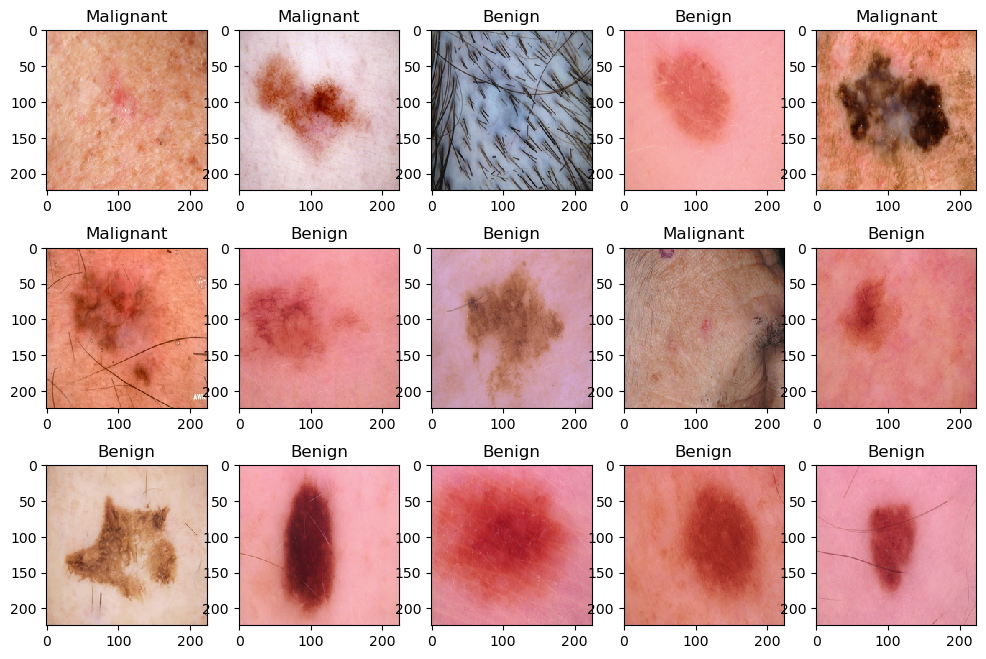

In [22]:
fig = plt.figure(figsize=(12,8))
columns = 5
rows = 3

for i in range(1, columns*rows+1):
    ax = fig.add_subplot(rows, columns, i)
    if y_train[i] == 0 :
        ax.title.set_text('Benign')
    else :
        ax.title.set_text('Malignant')
    plt.imshow(X_train[i], interpolation='nearest')
plt.show()

In [23]:
import keras
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

print('Done!')

Done!


In [24]:
X_train = X_train/255
X_test = X_test/255

print('Done!')

Done!


In [25]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten
from keras.optimizers import Adam

model = keras.Sequential()

model.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same",input_shape=(224,224,3)))
model.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))

model.add(keras.layers.Conv2D(512,(5,5),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(512,(5,5),activation="relu",padding="same"))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(1500,activation="relu"))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Dense(2,activation="softmax"))

model.summary()

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 conv2d_11 (Conv2D)          (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 74, 74, 64)        18496     
                                                                 
 conv2d_13 (Conv2D)          (None, 74, 74, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                  

In [26]:
from keras.callbacks import ReduceLROnPlateau

learning_rate_annealer = ReduceLROnPlateau(monitor='val_acc', patience=5,
                                          verbose=1, factor=0.5, min_lr=1e-7)
history = model.fit(X_train, y_train, batch_size=64, validation_split=0.2, epochs=25)
print(history.history.keys())

Epoch 1/25
33/33 [==============================] - 6s 157ms/step - loss: 0.6697 - accuracy: 0.5884 - val_loss: 0.6621 - val_accuracy: 0.6761
Epoch 2/25
33/33 [==============================] - 4s 122ms/step - loss: 0.5532 - accuracy: 0.7421 - val_loss: 0.4466 - val_accuracy: 0.7803
Epoch 3/25
33/33 [==============================] - 4s 121ms/step - loss: 0.4413 - accuracy: 0.7809 - val_loss: 0.3993 - val_accuracy: 0.8030
Epoch 4/25
33/33 [==============================] - 4s 121ms/step - loss: 0.4301 - accuracy: 0.7914 - val_loss: 0.4935 - val_accuracy: 0.7254
Epoch 5/25
33/33 [==============================] - 4s 129ms/step - loss: 0.4323 - accuracy: 0.7862 - val_loss: 0.3913 - val_accuracy: 0.7992
Epoch 6/25
33/33 [==============================] - 4s 121ms/step - loss: 0.3864 - accuracy: 0.8132 - val_loss: 0.4616 - val_accuracy: 0.8220
Epoch 7/25
33/33 [==============================] - 4s 126ms/step - loss: 0.4723 - accuracy: 0.7895 - val_loss: 0.4484 - val_accuracy: 0.8220
Epoch 

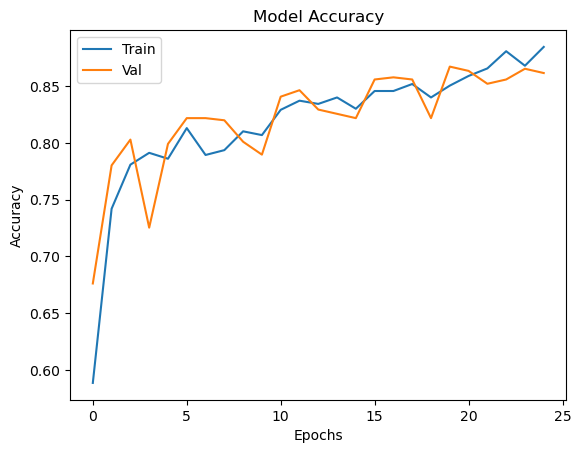

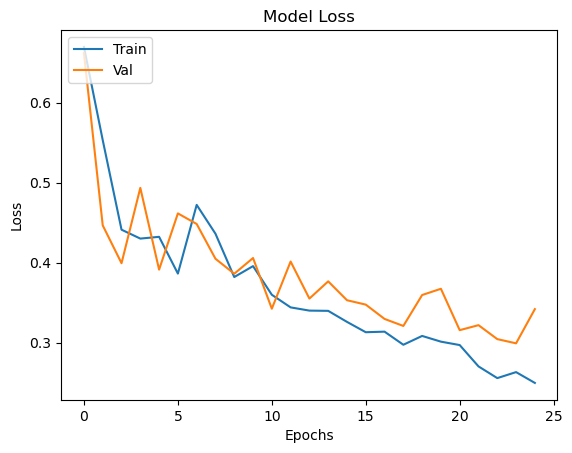

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [28]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_pred = np.array(y_pred, dtype='uint8')
print('Done!')

21/21 [==============================] - 1s 22ms/step
Done!


In [34]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay

print("Train Accuracy  : {:.2f} %".format(history.history['accuracy'][-1]*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(np.argmax(y_test, axis=1),y_pred)*100))

Train Accuracy  : 88.48 %
Test Accuracy   : 83.79 %


In [38]:
model.save('final_model.h5')

<Figure size 500x100 with 0 Axes>

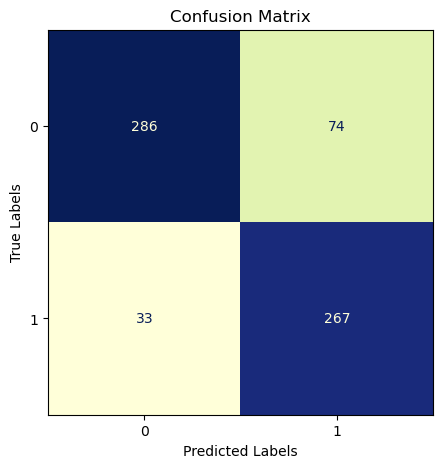

In [37]:
plt.figure(figsize= (5,1))
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(5,5))
disp.plot(ax=ax,colorbar= False,cmap = 'YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()